# Trabajo Práctico 2 [Parte 3]

#### Ing. Luciano M. Smith

En esta última parte se propone un modelo con una serie de features reducida en forma "extrema" utilizando mi criterio. Se probarán los mismos modelos que en la parte 1: regresion lineal, regresion logistica junto con random forest y MLP. 

# Importar librerías

Se importan las librerías que serán utilizadas en el trabajo.

In [2]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib import style
import plotly.express as px  # conda install -c plotly plotly

# Preprocesado y modelado
# ==============================================================================
#from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge
from sklearn import linear_model
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import RidgeCV
#from sklearn.linear_model import Lasso, LassoCV
#from sklearn.linear_model import ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Cargar datos
Se cargan los datos de entrenamiento.

In [3]:
columnas = ['likes', 'visitas', 'interes', 'categoria', 'min_cc1', 'max_cc1','average_cc1', 'median_cc1', 'std_dev_cc1','min_cc2', 'max_cc2','average_cc2', 'median_cc2', 'std_dev_cc2', 'min_cc3', 'max_cc3','average_cc3', 'median_cc3', 'std_dev_cc3','min_cc4', 'max_cc4','average_cc4', 'median_cc4', 'std_dev_cc4','min_cc5', 'max_cc5','average_cc5', 'median_cc5', 'std_dev_cc5', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5','base_time', 'post_length', 'post_share_count', 'post_promotion_status', 'hour_local', 'pub_domingo', 
            'pub_lunes', 'pub_martes', 'pub_miercoles', 'pub_jueves', 'pub_viernes', 'pub_sabado', 'base_domingo', 'base_lunes', 'base_martes', 'base_miercoles', 'base_jueves', 'base_viernes', 'base_sabado', 'target']
ds = pd.read_csv('Features_Variant_5.csv', sep = ',', names=columnas)
ds.head()

,likes,visitas,interes,categoria,min_cc1,max_cc1,average_cc1,median_cc1,std_dev_cc1,min_cc2,...,pub_viernes,pub_sabado,base_domingo,base_lunes,base_martes,base_miercoles,base_jueves,base_viernes,base_sabado,target
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,1,0,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0


# Reducción manual del dataset

Se realiza un nuevo intento por obtener mejores resultados generando un nuevo set de datos reducido eliminando columnas en forma arbitraria. La reducción se realiza con el fin de encontrar un modelo más simple pero con mejor performance. 

En primer lugar, se analiza la columna target (número de comentarios en las siguientes H horas - columna 39). Luego, se cambia la definicion de dicha columna a: "número de comentarios en las siguientes 24 horas" y se eliminan todos los registros cuya columna H no sea 24.

Por otro lado se asume que la cantidad de comentarios esta directamente realacionada con las caracteristicas de la pagina y no, al menos en forma directa, de las essential features y sus columnas derivadas así como también la información relacionada con la fecha base.

Por último, el día de la publicación se lleva a una columna y se eliminan las columnas binarias.

Entonces, el set de datos generado, tiene en cuenta unicamente los features relacionados directamente con la pagina, caracteristicas del posteo y fecha de publicación.

In [4]:
ds2 = ds
ds2.drop(ds2[ds2.hour_local!=24].index, inplace = True) 
ds2.loc[ds2.pub_domingo == 1, 'pub_dia'] = 7
ds2.loc[ds2.pub_lunes == 1, 'pub_dia'] = 1
ds2.loc[ds2.pub_martes == 1, 'pub_dia'] = 2
ds2.loc[ds2.pub_miercoles == 1, 'pub_dia'] = 3
ds2.loc[ds2.pub_jueves == 1, 'pub_dia'] = 4
ds2.loc[ds2.pub_viernes == 1, 'pub_dia'] = 5
ds2.loc[ds2.pub_sabado == 1, 'pub_dia'] = 6
ds2['objetivo'] = ds2.target
ds2 = ds2.drop(ds2.columns[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53]], axis=1)
ds.head()

,likes,visitas,interes,categoria,min_cc1,max_cc1,average_cc1,median_cc1,std_dev_cc1,min_cc2,...,base_domingo,base_lunes,base_martes,base_miercoles,base_jueves,base_viernes,base_sabado,target,pub_dia,objetivo
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,1,0,0,0,3.0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,4.0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,5.0,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,1,0,0,0,0,0,0,5.0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,1,0,0,0,1.0,0


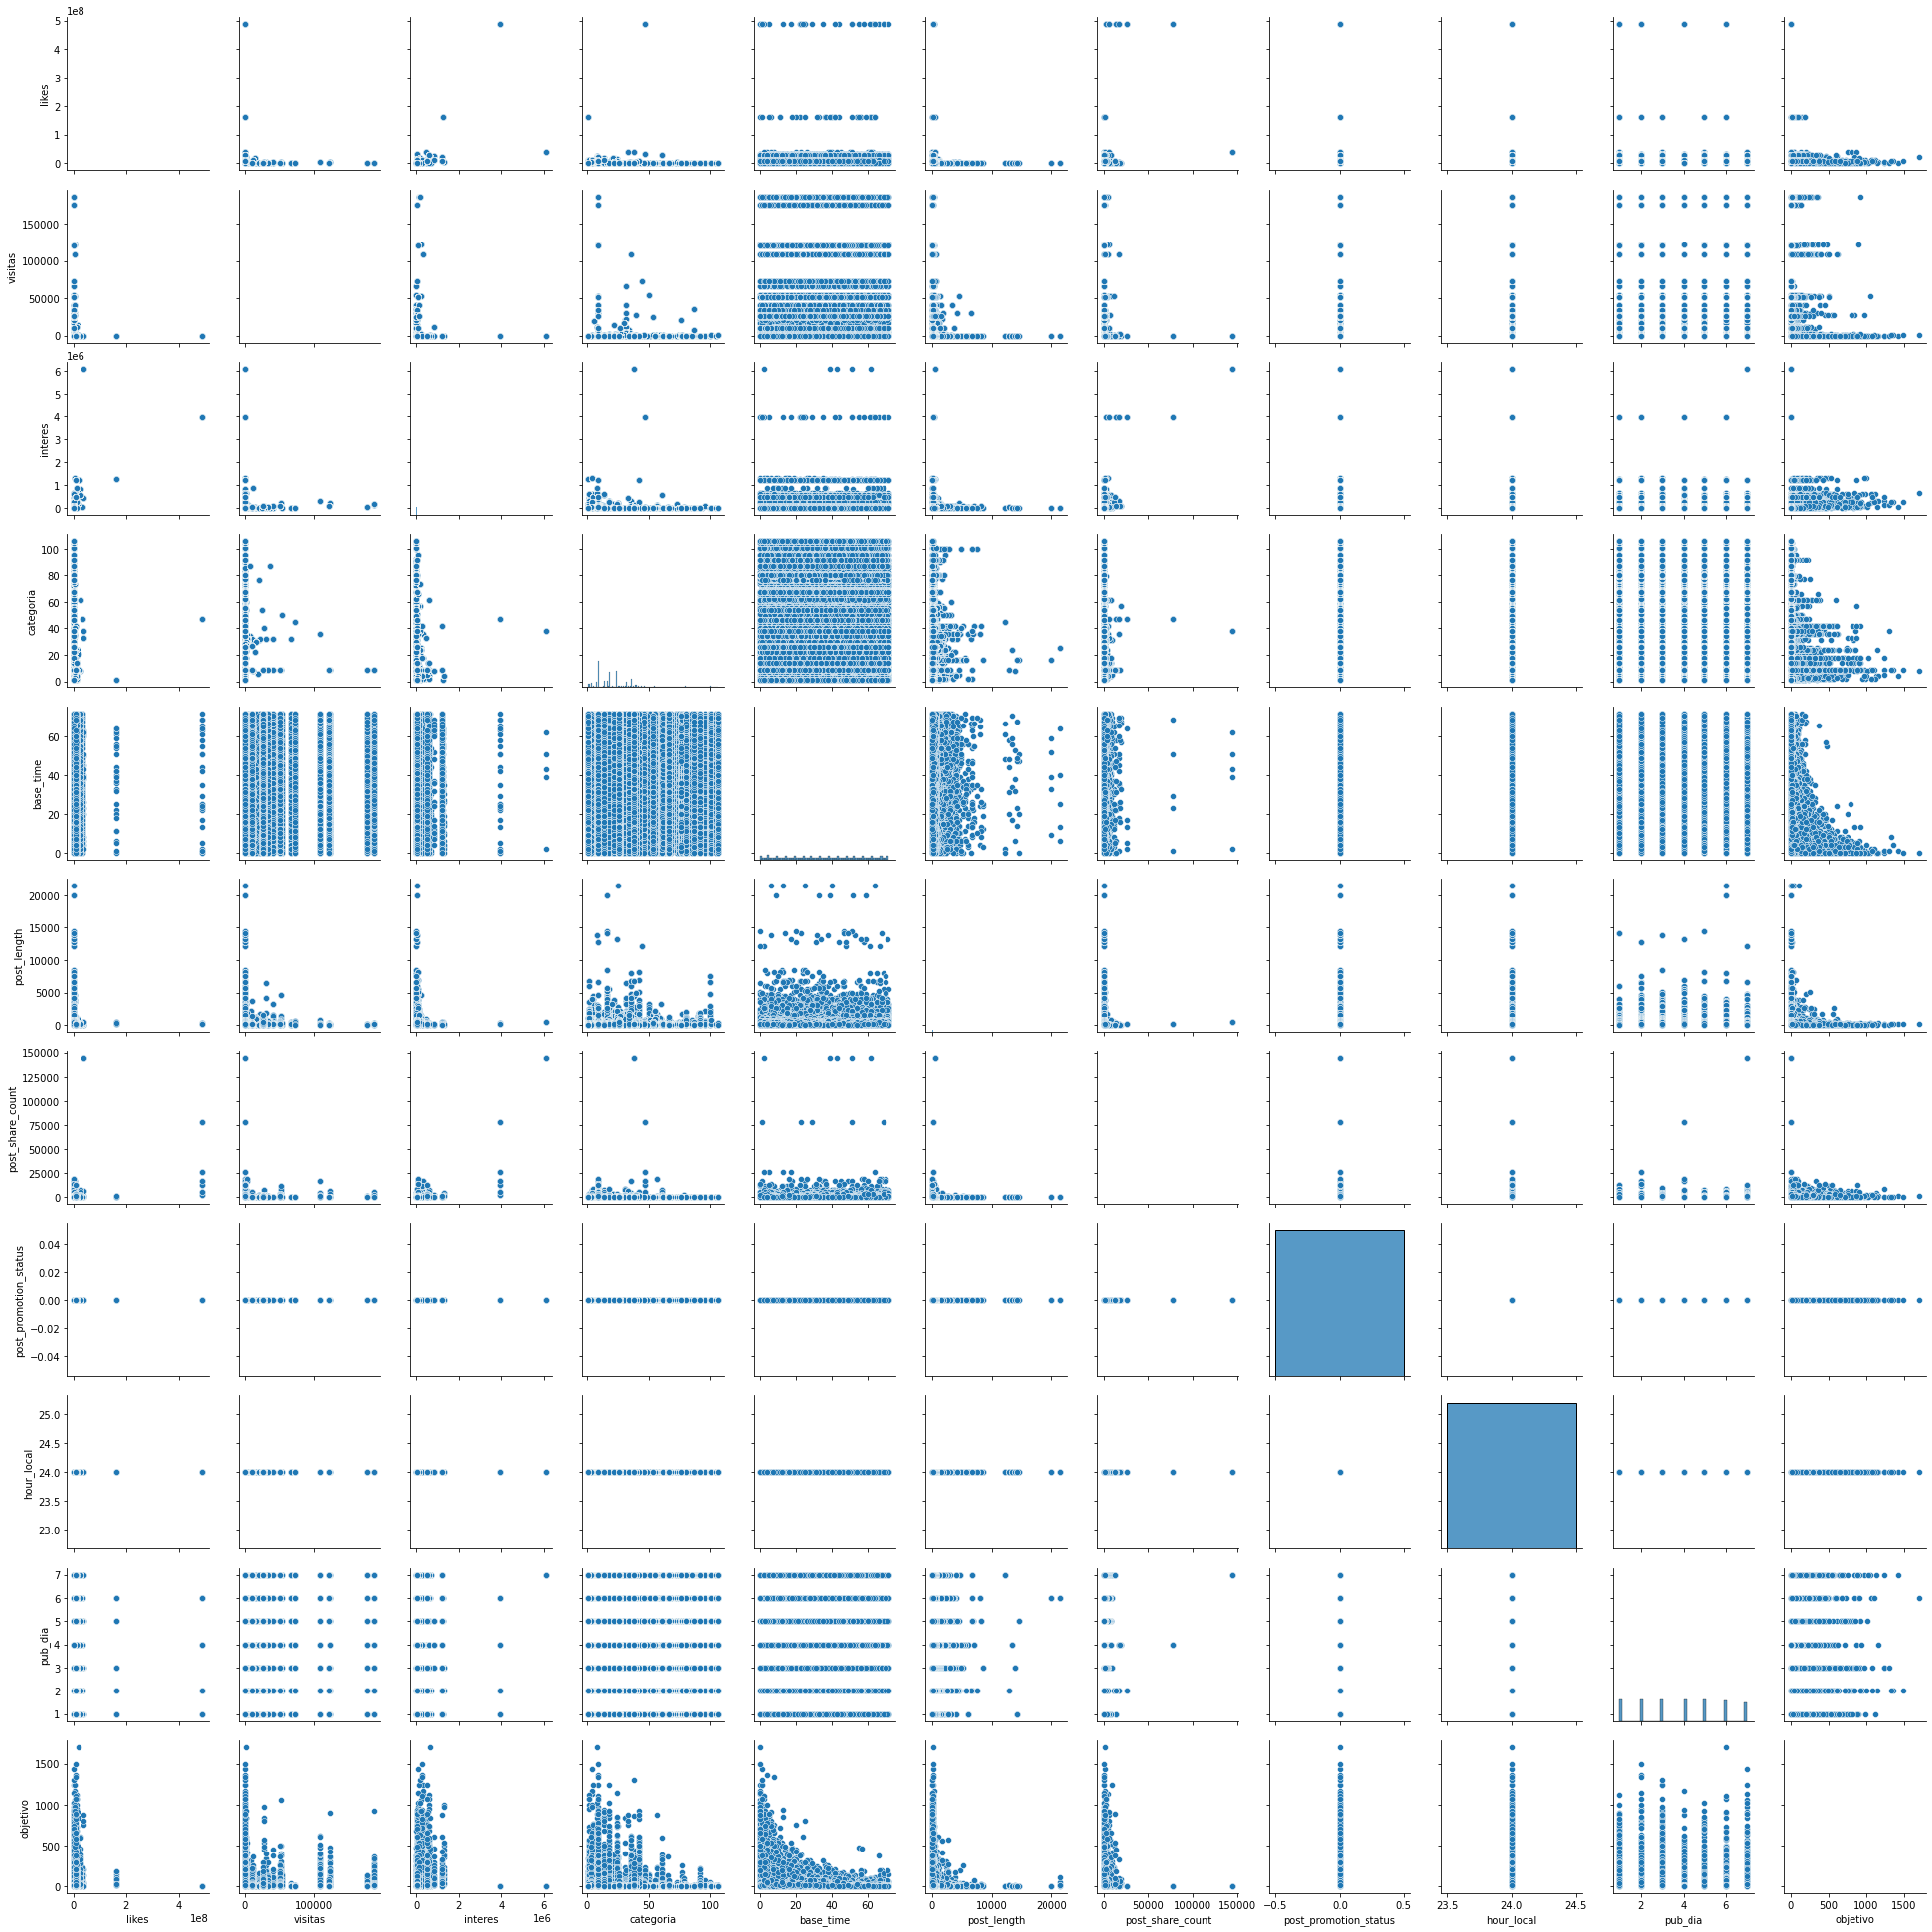

In [5]:
# se realiza un gráfico comparando todas las features frente al target.
# ==============================================================================

columnas2 = ['likes', 'visitas', 'interes', 'categoria','base_time', 'post_length', 'post_share_count', 'post_promotion_status', 'hour_local', 'pub_dia', 'objetivo']

sns.pairplot(ds2)

In [6]:
# elimino post_promotion_status y hour_local dado que no aportan información al modelo
# ========================================================================================

columnas2 = ['likes', 'visitas', 'interes', 'categoria','base_time', 'post_length', 'post_share_count', 'pub_domingo', 
            'pub_lunes', 'pub_martes', 'pub_miercoles', 'pub_jueves', 'pub_viernes', 'pub_sabado', 'target']


ds2 = ds2.drop('post_promotion_status', 1)
ds2 = ds2.drop('hour_local', 1)

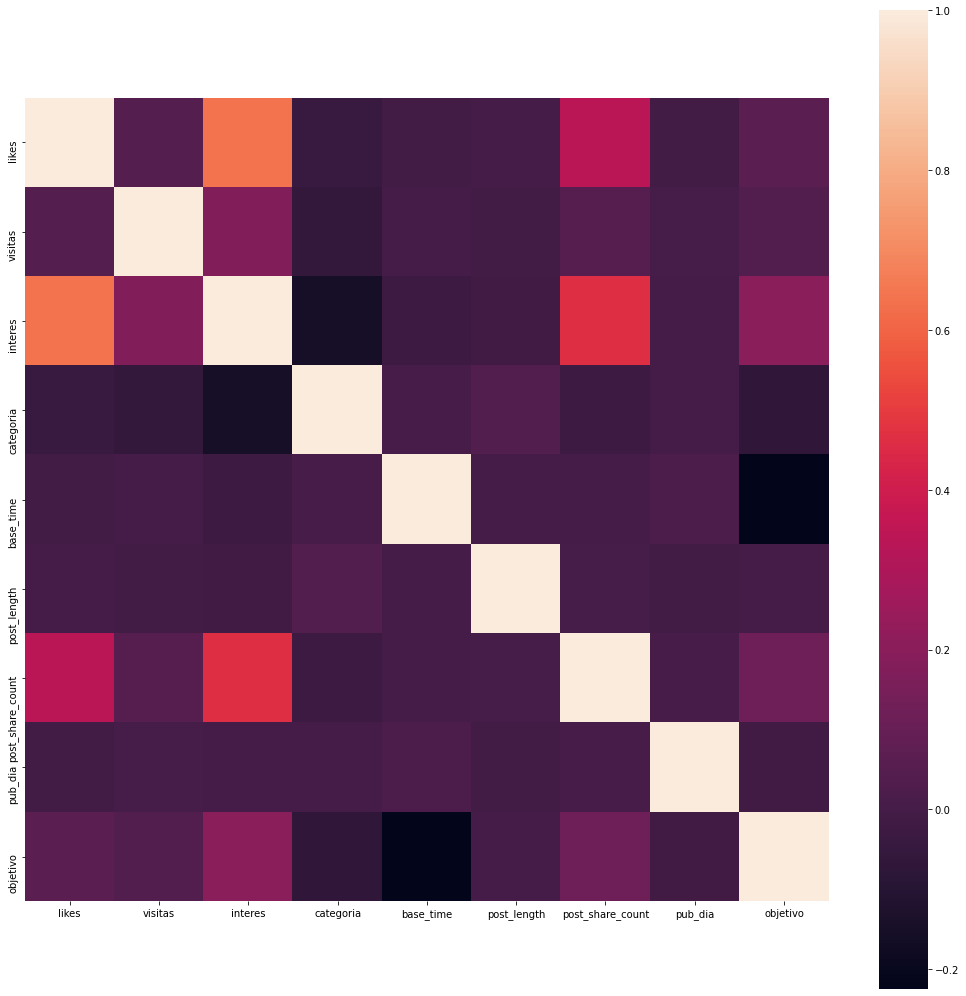

In [7]:
# matriz de correlaciones
# ==============================================================================
corr_matrix = ds2.corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))

sns.heatmap(corr_matrix, square = True, ax = ax)

ax.tick_params(labelsize = 10)

# División del dataset

In [9]:
X = ds2.drop(columns=['objetivo'],axis=1) 
y = ds2['objetivo']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), 
                                                    train_size = 0.7, random_state = 46,shuffle = True)

In [10]:
X_train.describe()

,likes,visitas,interes,categoria,base_time,post_length,post_share_count,pub_dia
count,1.367750e+05,136775.000000,1.367750e+05,136775.000000,136775.000000,136775.000000,136775.000000,136775.000000
mean,1.290343e+06,4633.022987,4.273755e+04,24.267096,35.455851,163.490718,116.117478,3.921901
std,6.765897e+06,20395.089429,1.058540e+05,19.943444,21.093506,381.038878,913.374957,1.964514
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000,1.000000
25%,3.550800e+04,0.000000,6.280000e+02,9.000000,17.000000,37.000000,2.000000,2.000000
50%,2.853200e+05,0.000000,6.523000e+03,18.000000,35.000000,97.000000,13.000000,4.000000
75%,1.203855e+06,99.000000,4.954000e+04,32.000000,54.000000,172.000000,60.000000,6.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,72.000000,21480.000000,144860.000000,7.000000


# Modelos y evaluación
Se prueban diferentes modelos para predecir la variable objetivo. 
Se calculan las métricas correspondientes. 

In [14]:
# Como la regularización de Ridge y Lasso operan sobre las magnitudes de los parámetros, es necesario 
# estandarizar las features para que tengan igual rango de escala.

from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Escalamos el dataset de entrenamiento haciendo un fit y transform del scaler
X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

# Transformamos el dataset de test (no hacemos fit)
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

columnas_train = ['likes', 'visitas', 'interes', 'categoria', 'base_time', 'post_length', 'post_share_count', 'pub_dia']

## (A) Linear Regression con regularización Lasso

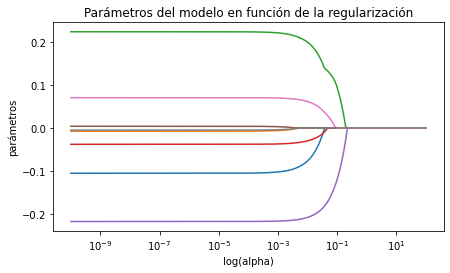

In [15]:
# Determinación del alpha
alphas = np.logspace(-10, 2, 200)

# Evolución de los parámetros en función de alpha

coefs = []

for alpha in alphas:
    modelo_temp = linear_model.Lasso(alpha=alpha)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [16]:
A = 0.01
regr_lr = linear_model.Lasso(alpha=A)
regr_lr.fit(X = X_train, y = y_train)

Lasso(alpha=0.01)

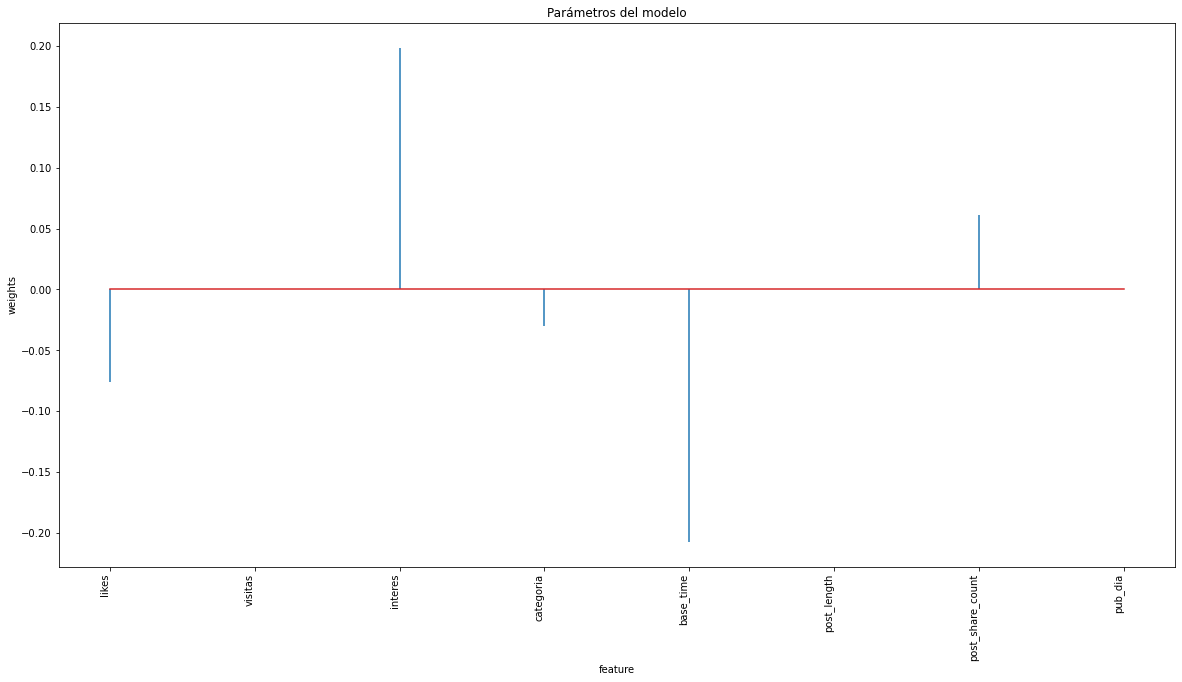

In [17]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame({'predictor': columnas_train,'coef': regr_lr.coef_.flatten()})
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

Acorde a lo anterior, las features que se consideran relevantes para el modelo son:

In [18]:
res_lr = pd.Series(abs(regr_lr.coef_), index=columnas_train).sort_values(ascending=False)
res_lr = res_lr[res_lr > 0]
print(res_lr)

base_time           0.207467
interes             0.198792
likes               0.076411
post_share_count    0.061252
categoria           0.030037
dtype: float64


In [19]:
# Prueba del modelo
predicciones = regr_lr.predict(X=X_test)
predicciones = predicciones.flatten()

In [20]:
#Error de test del modelo. 

rmse_ols = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
R2 = metrics.r2_score(y_test, predicciones)

print(f"El error (rmse) de test es: {rmse_ols}")
print(f"R^2 es: {R2}")


El error (rmse) de test es: 0.9154045649798122
R^2 es: 0.09684822269481563


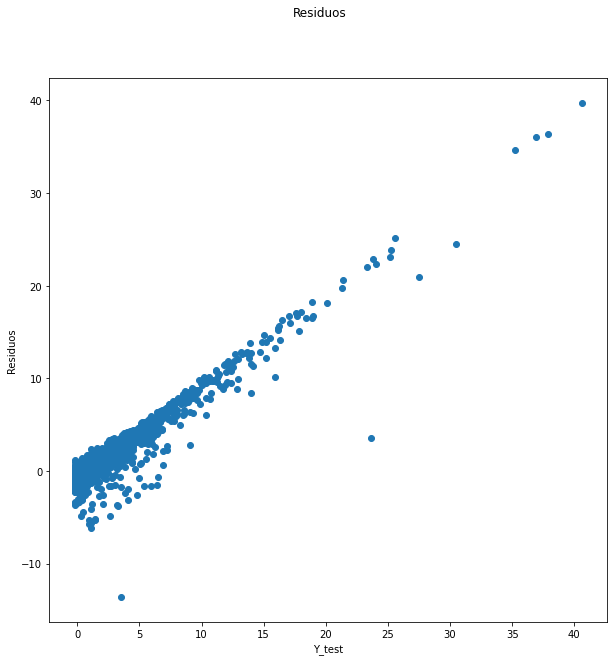

In [52]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Residuos')
plt.xlabel('Y_test')
plt.ylabel('Residuos')
plt.scatter(y_test,y_test-predicciones.reshape(-1, 1))

#### Conclusiones:

Evidentemente, analizando las métricas, este modelo es el peor que obtuvimos hasta el momento.

## (B) Logistic Regression
Si bien lo que se desea es obtener es la estimación del número de comentarios, decidí probar la regresión logística con el objetivo de poder clasificar si un post será existoso o no en función de los comentarios que se realicen.

In [21]:
X_lr = pd.DataFrame(ds2.drop(columns=['objetivo'],axis=1))
y_lr = pd.DataFrame(ds2['objetivo'])

y_lr.loc[y_lr.objetivo == 0, 'objetivo'] = 0
y_lr.loc[y_lr.objetivo >= 50, 'objetivo'] = 1
y_lr.loc[y_lr.objetivo > 100, 'objetivo'] = 2

y_lr['objetivo'] = y_lr['objetivo'].astype("string")

y_lr.loc[y_lr.objetivo == '0', 'objetivo'] = 'A'
y_lr.loc[y_lr.objetivo == '1', 'objetivo'] = 'B'
y_lr.loc[y_lr.objetivo == '2', 'objetivo'] = 'C'
#y_lr.loc[y_lr.Comments == '3', 'Comments'] = 'D'
#y_lr.loc[y_lr.target == '4', 'target'] = 'E'


X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr.values.reshape(-1,1), 
                                                    train_size = 0.7, random_state = 46,shuffle = True)

# 0 COMENTARIOS = A (NO EXITOSO)
# 1 a 10 COMENTARIOS = B (BAJO EXITO)
# 11 a 100 COMENTARIOS = C (MODERADO EXITO)
# 101 a 500 COMENTARIOS = D (EXITOSO)
# mas de 500 COMENTARIOS = E (MUY EXITOSO)

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train_lr, y_train_lr)
predicciones = clf.predict(X_test_lr)

clf.score(X_test_lr, y_test_lr) #accuracy

0.5205397659422021

#### Conclusiones:

Este modelo de clasificación, con un nivel de precisión del 52%, es similar a los obtenidos en las otras partes.

## (C) Random Forest
Se decide probar este modelo que utiliza decisions trees ya que en el paper se han probado modelos con árboles de decisión.

In [23]:
regr_rf = RandomForestRegressor(max_depth=15, random_state=0)
regr_rf.fit(X_train, y_train)
predicciones = regr_rf.predict(X_test)

0.564758028540375

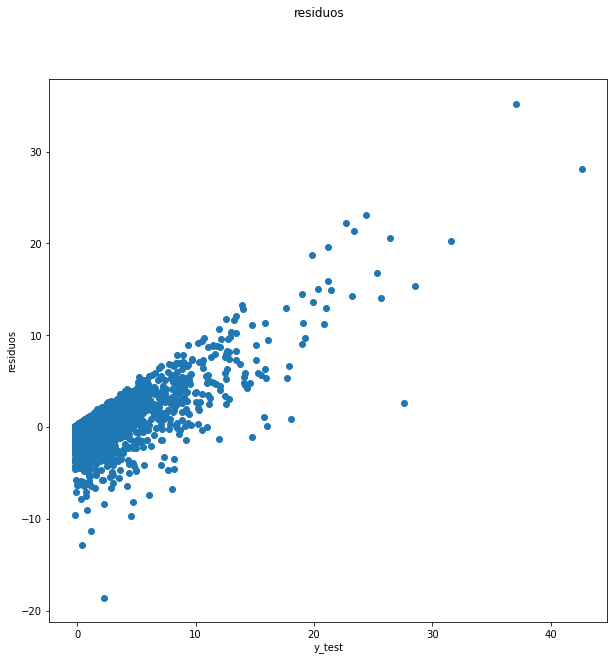

In [24]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,y_test-predicciones.reshape(-1, 1))
regr_rf.score(X_test, y_test)

In [25]:
rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
R2 = metrics.r2_score(y_test, predicciones)

print(f"El error (rmse) de test es: {rmse}")
print(f"R^2 es: {R2}")

El error (rmse) de test es: 0.635474441048768
R^2 es: 0.564758028540375


## Conclusiones:

Con una profundidad de 15, el modelo con el dataset reducido en forma manual obtiene resultados similares a los obtenidos con el mismo método y el dataset completo (parte 1). 

## (D) MLP Multi-Layer Perceptron

In [26]:
regr_mlp = MLPRegressor(random_state=1, max_iter=1000)
regr_mlp.fit(X_train, y_train)
predicciones = regr_mlp.predict(X_test)

0.40235471809514556

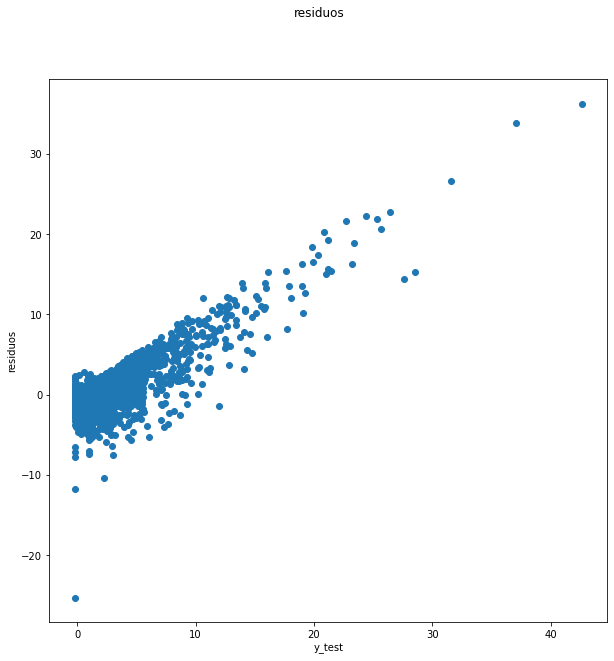

In [27]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,y_test-predicciones.reshape(-1, 1))
regr_mlp.score(X_test, y_test)

In [29]:
# Error de test del modelo. 

rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
R2 = metrics.r2_score(y_test, predicciones)

print(f"El error (rmse) de test es: {rmse}")
print(f"R^2 es: {R2}")

El error (rmse) de test es: 0.7446538702900518
R^2 es: 0.40235471809514556


## Conclusiones:

Este modelo MLP con el dataset reducido en forma manual tampoco genera buenos resultados.